## **Classifier POC - Urgent vs. Non-Urgent Messages**
### Data preparation

In [223]:
import pandas as pd

df = pd.read_csv('helpdesk_customer_tickets.csv')
df.shape

(1566, 18)

In [224]:
df[df['language'] == 'en'].sample(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
461,2778487924549,Network Issues with Cisco Router,"Dear Customer Support, \n\nI am reaching out t...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Technical Support,high,en,IT Services,Technical Support,Network Issue,Hardware Failure,Problem Resolution,Service Disruption,Service Recovery,IT Support,NaN,NaN
296,2101956907359,Dell XPS 13 9310 Issues,"Dear Customer Support,\n\nI recently purchased...","Dear <name>,\n\nThank you for contacting us re...",Request,Product Support,high,en,Tech Online Store,Product Support,Technical Support,Warranty Claim,Hardware Failure,System Crash,Performance Tuning,Service Recovery,NaN,NaN
729,4110716676739,Billing Inquiry for Service Renewal,"Dear Customer Support, I am requesting the bil...","Dear <name>,\n\nThank you for reaching out abo...",Request,Billing and Payments,medium,en,Tech Online Store,Billing Issue,Customer Service,Product Support,Account Assistance,Sales Inquiry,NaN,NaN,NaN,NaN
233,1840463522646,Malfunctioning LG OLED C1 Display Issue,"Dear Customer Support, I am experiencing inter...","Dear <name>, \n\nThank you for reaching out. W...",Incident,Customer Service,high,en,Tech Online Store,Product Support,Technical Support,Hardware Failure,Returns and Exchanges,Problem Resolution,Service Recovery,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN
632,3584258119372,Urgent: Optimize AWS Infrastructure for Cost E...,"Dear Customer Support, I am reaching out to re...","Dear <name>, \n\nThank you for reaching out. W...",Request,IT Support,high,en,IT Services,Technical Support,Urgent Issue,General Inquiry,Technical Guidance,Performance Tuning,Problem Resolution,NaN,NaN,NaN
845,4718315285165,Issues with Cisco Router ISR4331,"Hello, I am experiencing frequent disconnectio...","Hello, Thank you for reaching out. For the dis...",Problem,Technical Support,high,en,Tech Online Store,Technical Support,Network Issue,Problem Resolution,Service Disruption,IT Support,NaN,NaN,NaN,NaN
872,4861758556949,Request for AWS Infrastructure Scaling Assistance,"Hello customer support team,\n\nI am reaching ...","Hello,\n\nThank you for reaching out about you...",Request,IT Support,high,en,IT Services,Technical Support,Product Support,IT Support,Performance Tuning,Service Notification,Technical Guidance,NaN,NaN,NaN
775,4320184632469,Performance Issues with MySQL 8.0.30 Database,"Dear Customer Support Team,\n\nI am writing to...","Dear <name>,\n\nThank you for reaching out wit...",Problem,Technical Support,high,en,IT Services,Technical Support,Performance Tuning,Software Bug,Product Support,Problem Resolution,Technical Guidance,NaN,NaN,NaN
375,2402571086775,High Priority: Delay in Server Setup Disruptin...,"Greetings Customer Support,\n\nWe are facing a...","Dear <name>,\n\nThank you for getting in touch...",Incident,Customer Service,high,en,IT Consulting Firm,Service Disruption,Urgent Issue,Technical Support,System Maintenance,Incident Report,NaN,NaN,NaN,NaN


### Function to add some more random records to this dataset for training

In [225]:
import pandas as pd
import random
import numpy as np

# Define possible values for each column
types = ['Incident', 'Request', 'Problem', 'Change']
queues = ['Technical Support', 'Product Support', 'Sales and Pre-Sales',
          'Returns and Exchanges', 'IT Support', 'Billing and Payments',
          'Customer Service', 'Service Outages and Maintenance',
          'Human Resources', 'General Inquiry']
priorities = ['high', 'medium', 'low']
languages = ['en', 'es', 'fr', 'de']
business_types = ['Tech Online Store', 'E-commerce', 'Software Solutions', 'IT Services']
tags = ['Technical Support', 'Product Support', 'Software Bug', 'Network Issue',
        'Problem Resolution', 'Billing Issue', 'Account Help', 'Product Inquiry']

# Define keywords for urgent and non-urgent emails
urgent_keywords = ['urgent', 'critical', 'asap', 'immediate attention', 'system down']
non_urgent_keywords = ['general inquiry', 'information request', 'follow-up', 'schedule']

# Generate synthetic data
def generate_email_data(num_records):
    records = []
    for _ in range(num_records):
        is_urgent = random.choice([True, False])  # Randomly assign urgency
        subject_keywords = urgent_keywords if is_urgent else non_urgent_keywords
        body_keywords = urgent_keywords if is_urgent else non_urgent_keywords

        # Generate a record
        record = {
            'id': random.randint(1000000, 9999999),
            'subject': f"{random.choice(['Assistance Required', 'Update', 'Notification'])}: {random.choice(subject_keywords)}",
            'body': f"Dear Support,\n\nThis email is regarding {random.choice(body_keywords)}.\n\nPlease assist.\n\nThank you.",
            'answer': "Dear Customer,\n\nThank you for reaching out. We will address your query promptly.",
            'type': random.choice(types),
            'queue': random.choice(queues),
            'priority': 'high' if is_urgent else random.choice(['medium', 'low']),
            'language': random.choice(languages),
            'business_type': random.choice(business_types),
            'tag_1': random.choice(tags),
            'tag_2': random.choice(tags),
            'tag_3': random.choice(tags),
            'tag_4': random.choice(tags),
            'tag_5': random.choice(tags),
            'tag_6': np.nan,
            'tag_7': np.nan,
            'tag_8': np.nan,
            'tag_9': np.nan,
        }
        records.append(record)
    return records

# Generate 100 synthetic records
new_records = generate_email_data(100)

# Create a DataFrame
new_df = pd.DataFrame(new_records)

# Display the generated DataFrame
new_df.sample(3)


,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
97,6205136,Notification: general inquiry,"Dear Support,\n\nThis email is regarding follo...","Dear Customer,\n\nThank you for reaching out. ...",Incident,Customer Service,low,en,E-commerce,Billing Issue,Account Help,Billing Issue,Problem Resolution,Product Inquiry,NaN,NaN,NaN,NaN
58,9444098,Notification: system down,"Dear Support,\n\nThis email is regarding urgen...","Dear Customer,\n\nThank you for reaching out. ...",Incident,Product Support,high,fr,IT Services,Network Issue,Software Bug,Network Issue,Network Issue,Product Support,NaN,NaN,NaN,NaN
93,5510600,Assistance Required: follow-up,"Dear Support,\n\nThis email is regarding gener...","Dear Customer,\n\nThank you for reaching out. ...",Change,Returns and Exchanges,low,de,IT Services,Problem Resolution,Billing Issue,Software Bug,Product Support,Problem Resolution,NaN,NaN,NaN,NaN


In [226]:
df.priority.value_counts()
df.priority.isna().sum()

np.int64(0)

### Data Cleaning

In [227]:
df.dropna(subset=['body'], inplace=True)
df.dropna(subset=['subject'], inplace=True)

# drop all tags
df.drop(columns=['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9'], inplace=True)

In [228]:
df.type.unique()

array(['Incident', 'Request', 'Problem', 'Change'], dtype=object)

In [229]:
df.queue.unique()

array(['Technical Support', 'Product Support', 'Sales and Pre-Sales',
       'Returns and Exchanges', 'IT Support', 'Billing and Payments',
       'Customer Service', 'Service Outages and Maintenance',
       'Human Resources', 'General Inquiry'], dtype=object)

In [230]:
df.business_type.unique()

array(['IT Services', 'Tech Online Store', 'IT Consulting Firm',
       'Software Development Company', 'IT Consulting Service'],
      dtype=object)

In [231]:
df.drop(columns=['business_type'], inplace=True)

### Data Visualization

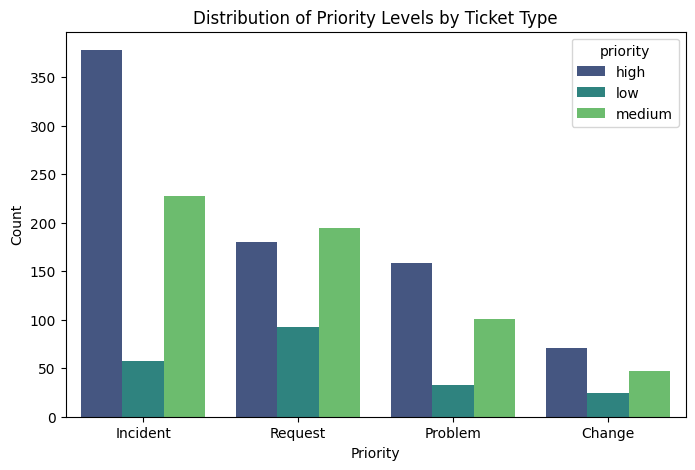

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of priority
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', palette='viridis', hue='priority')
plt.title("Distribution of Priority Levels by Ticket Type")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()

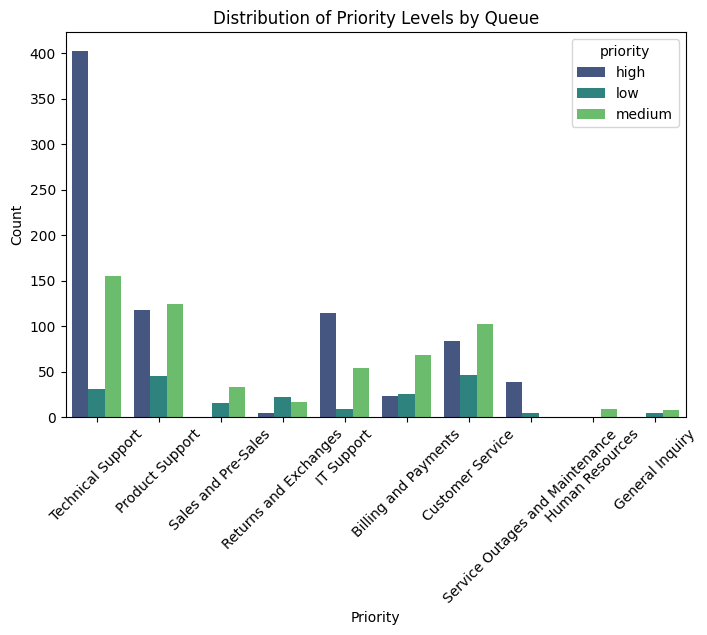

In [233]:
# Countplot of priority
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='queue', palette='viridis', hue='priority')
plt.title("Distribution of Priority Levels by Queue")
plt.xlabel("Priority")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

### Data Preprocessing

In [234]:
import spacy

nlp = spacy.load('en_core_web_sm')

# create function to preprocess text
def preprocess_text(text):
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').strip().lower()
    doc = nlp(text)
    preprocessed_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return preprocessed_tokens

# preprocess the subject and body columns
df['subject_tokenized'] = df['subject'].apply(preprocess_text)
df['body_tokenized'] = df['body'].apply(preprocess_text)


In [235]:
df[df['language'] == 'en'].sample(3)


,id,subject,body,answer,type,queue,priority,language,subject_tokenized,body_tokenized
431,2669013662886,Request for Server Configuration Changes,"Dear Customer Support Team,\n\nI hope this mes...","Dear <name>,\n\nThank you for reaching out to ...",Change,IT Support,medium,en,"[request, server, configuration, change]","[dear, customer, support, team, , hope, messa..."
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\nWe are ...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,"[request, server, administration, assistance]","[dear, service, customer, support, , write, ..."
1062,6201163562678,Request for Expert Consultation on Ticket System,"Dear IT Services Support Team,\n\nI am writing...","Dear <name>,\n\nThank you for contacting us re...",Problem,Customer Service,high,en,"[request, expert, consultation, ticket, system]","[dear, service, support, team, , write, bring..."


In [236]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

def count_vectorize_column(column):
    return vectorizer.fit_transform(column.apply(lambda x: ' '.join(x)))

subject_bow = count_vectorize_column(df['subject_tokenized'])
body_bow = count_vectorize_column(df['body_tokenized'])

df["subject_bow"] = list(subject_bow.toarray())
df["body_bow"] = list(body_bow.toarray())

df.drop(columns=['subject_tokenized', 'body_tokenized'], inplace=True)

df.sample(3)

,id,subject,body,answer,type,queue,priority,language,subject_bow,body_bow
72,1266887566238,Issues with AWS Management Service Deployment,"Dear Customer Support Team,\n\nI hope this mes...","Dear <name>,\n\nThank you for reaching out to ...",Problem,Technical Support,medium,en,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
963,5494983818071,Demande d'informations détaillées sur les serv...,"Cher équipe d'assistance clientèle,\n\nJ'espèr...","Cher <name>,\n\nMerci de nous avoir contactés ...",Request,Sales and Pre-Sales,medium,fr,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
283,2048430313380,Touchscreen and Keyboard Issues with Surface P...,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out to ...",Problem,Sales and Pre-Sales,medium,en,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [237]:
# drop more unnecessary columns
df.drop(columns=['id', 'answer'], inplace=True)
df.sample(3)

,subject,body,type,queue,priority,language,subject_bow,body_bow
553,Clarification des frais de service,"Cher service client, j'espère que ce message v...",Request,Billing and Payments,medium,fr,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
622,Immediate Assistance Needed with Server Outage,"Hello IT Services Support Team,\n\nI am writin...",Problem,Technical Support,high,en,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
279,Request for Optimization of AWS Cloud Resource...,"Dear IT Services Customer Support,\n\nI am rea...",Request,Customer Service,medium,en,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [238]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[['type', 'queue']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['type', 'queue']))

one_hot_df.sample(3)


,type_Change,type_Incident,type_Problem,type_Request,queue_Billing and Payments,queue_Customer Service,queue_General Inquiry,queue_Human Resources,queue_IT Support,queue_Product Support,queue_Returns and Exchanges,queue_Sales and Pre-Sales,queue_Service Outages and Maintenance,queue_Technical Support
1304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
953,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [239]:
# Merge one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)
df.sample(3)

,subject,body,type,queue,priority,language,subject_bow,body_bow,type_Change,type_Incident,...,queue_Billing and Payments,queue_Customer Service,queue_General Inquiry,queue_Human Resources,queue_IT Support,queue_Product Support,queue_Returns and Exchanges,queue_Sales and Pre-Sales,queue_Service Outages and Maintenance,queue_Technical Support
764,Problemas con la mensajería en tiempo real,Estimado equipo de soporte de Tech Online Stor...,Incident,Technical Support,high,es,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
577,Dringende Unterstützung benötigt,"Sehr geehrter IT-Services-Support,\n\nIch hoff...",Problem,IT Support,high,de,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,Urgent Resolution Required,"Dear Customer Support Team, \n\nI am writing t...",Incident,IT Support,high,en,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [240]:
# Drop the original columns - priority and type
df.drop(columns=['queue', 'type'], inplace=True)

In [241]:
df.sample(3)

,subject,body,priority,language,subject_bow,body_bow,type_Change,type_Incident,type_Problem,type_Request,queue_Billing and Payments,queue_Customer Service,queue_General Inquiry,queue_Human Resources,queue_IT Support,queue_Product Support,queue_Returns and Exchanges,queue_Sales and Pre-Sales,queue_Service Outages and Maintenance,queue_Technical Support
615,Avis de maintenance planifiée,"Cher Équipe de Support Client, J'espère que ce...",low,fr,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250,Dringende Hilfe benötigt,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...",high,de,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
247,Anfrage zur IT-Beratung,"Sehr geehrtes Kundenserviceteam, ich hoffe, di...",low,de,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
# label encoding for priority
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['priority'] = label_encoder.fit_transform(df['priority'])

df.sample(3)

len(df.subject_bow)
len(df.body_bow)

1566

### Data Training

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack

subject_bow_array = df['subject_bow'].to_numpy()
# body_bow = df['body_bow'].to_numpy()
# X = hstack([subject_bow, body_bow])

# y = np.array(df['priority'])

# len(y)
print(df['subject_bow'].shape)


(1566,)


In [245]:
len(X.toarray())

1564